In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%precision 3
%matplotlib inline

In [2]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([2,3,4,3,5,4,6,7,4,8])

### Matplotlibでの描画

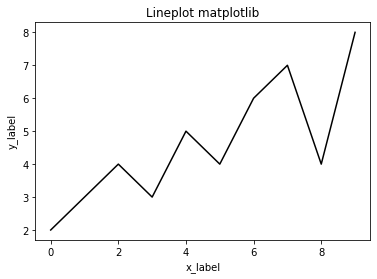

In [3]:
plt.plot(x, y, color='black') # グラフを描く
plt.title("Lineplot matplotlib") #タイトルを設定する
plt.xlabel("x_label") # xラベルを設定する
plt.ylabel("y_label") # yラベルを設定する
plt.savefig("matplotlib_test.png") # ファイルを保存する

### Seabornでの描画

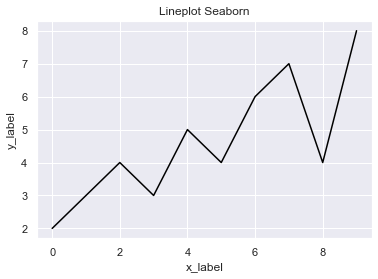

In [4]:
sns.set() # インポートしたSeabornのこの関数を実行すると、グラフのデザインが変わる
plt.plot(x, y, color='black')
plt.title('Lineplot Seaborn')
plt.xlabel('x_label')
plt.ylabel('y_label')
plt.savefig("seaborn_test.png") # ファイルを保存する

### Seabornでのヒストグラム

In [5]:
fish_data = np.array([2,3,3,4,4,4,4,5,5,6])
fish_data

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

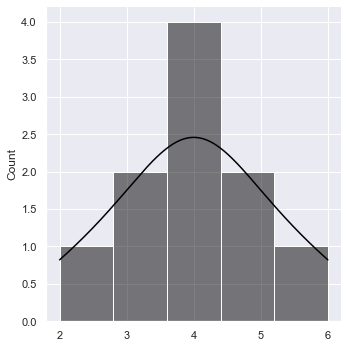

In [6]:
sns.displot(fish_data, bins=5, color='black', kde=True)
plt.savefig("hist1.png")

#### sns.displot()の引数のkdeはカーネル密度推定のこと
* カーネル密度推定とは、なめらかなヒストグラムのこと
* いくつかの標本から全体の分布を推定したい場合に使う
* seabornのdisplot関数は便利

### ヒストグラムを重ねる
* ここではfish_multiのspeciesによってヒストグラムを分ける
* ２つ作って重ねる方針

In [7]:
fish_multi = pd.read_csv('data/3-3-2-fish_multi_2.csv')
fish_multi.head()

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4


In [8]:
fish_multi.groupby('species').describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

In [9]:
length_A = fish_multi.query('species == "A"')['length']
length_B = fish_multi.query('species == "B"')['length']

<AxesSubplot:xlabel='length', ylabel='Count'>

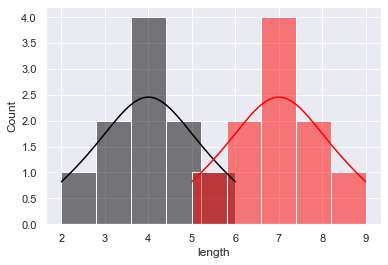

In [10]:
sns.histplot(length_A, bins=5, color='black', kde=True)
sns.histplot(length_B, bins=5, color='red', kde=True)

### Seabornでヒストグラムを簡単に重ねる
* Seabornなら、わざわざグループバイして２つ作って重ねなくてもヒストグラムを描けるぽい
* めちゃくちゃ便利

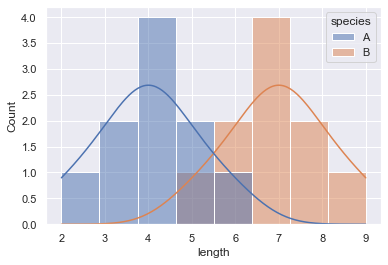

In [11]:
sns.histplot(data=fish_multi, x='length', hue='species', bins=8, kde=True)
plt.savefig("hist2.png")

## 箱ひげ図

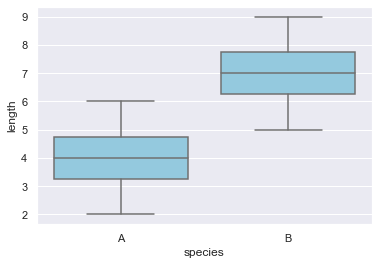

In [12]:
sns.boxplot(data=fish_multi, x='species', y='length', color='skyblue')
plt.savefig("boxplot.png")

## バイオリンプロット
* 箱ひげ図の、箱の代わりにカーネル密度推定の結果を用いたもの

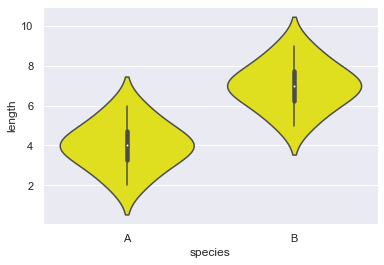

In [13]:
sns.violinplot(data=fish_multi, x='species', y='length', color='yellow')
plt.savefig("violinplot.png")

## 棒グラフ

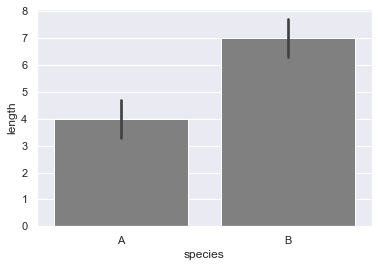

In [14]:
sns.barplot(data=fish_multi, x='species', y='length', color='gray')
plt.savefig("barplot.png")

## 散布図
* 散布図は、メジャー（数値型データ）とメジャーをかけ合わせて作る

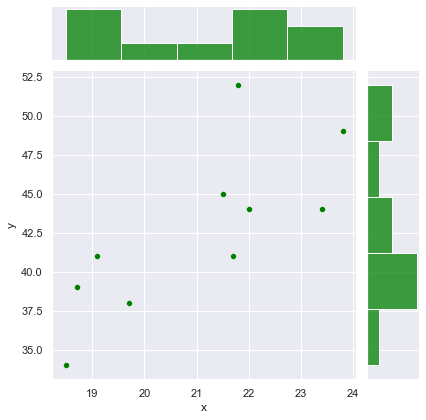

In [18]:
cov_data = pd.read_csv("data/3-2-3-cov.csv")
sns.jointplot(x='x', y='y', data=cov_data, color='green')

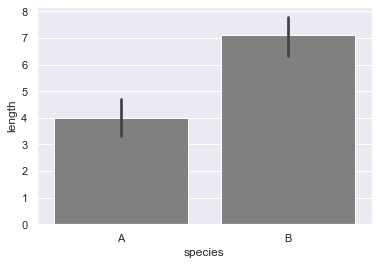

In [20]:
sns.barplot(data=fish_multi, x='species', y='length', color='gray')
plt.savefig('barplot.png')

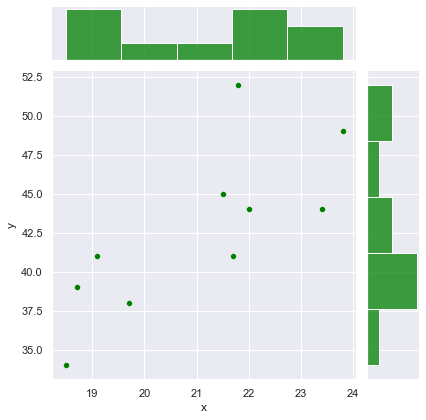

In [26]:
cov_data = pd.read_csv('data/3-2-3-cov.csv')
sns.jointplot(x='x', y='y', data=cov_data, color='green')
plt.savefig('scatter.png')

## ペアプロット

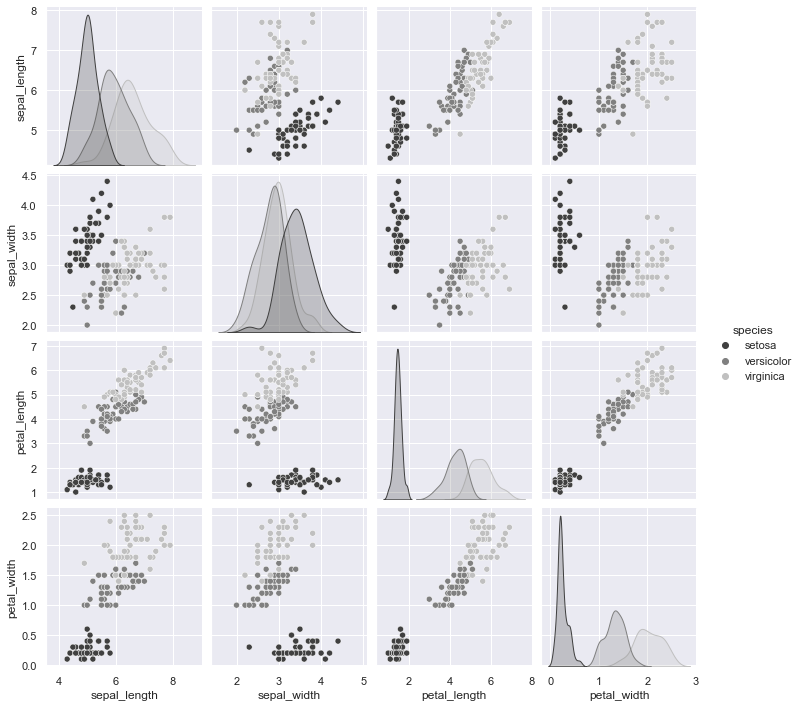

In [25]:
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue="species", palette='gray')
plt.savefig('pairplot.png')